In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
import seaborn as sns
import re
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
import numpy as np
import pandas as pd
import re

In [70]:
train_set = pd.read_csv('data/train.csv')
test_set = pd.read_csv('data/test.csv')
sub_set = pd.read_csv('data/sample_submit.csv')


In [71]:
train_set


,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,37576,Male,46,Returning,Business,Business,1608,0,0.0,1,...,5,5,5,3,2,5,1,5,5,Satisfied
1,56913,Male,30,Returning,Business,Business,1379,30,32.0,5,...,3,1,5,1,1,3,1,1,3,Neutral or Dissatisfied
2,6541,Female,50,Returning,Business,Business,414,0,0.0,5,...,4,5,4,5,3,4,5,4,4,Satisfied
3,40646,Female,48,Returning,Business,Economy,95,0,0.0,3,...,5,1,5,2,1,5,5,5,5,Satisfied
4,29947,Female,24,Returning,Business,Economy Plus,143,0,0.0,5,...,5,1,2,1,1,3,0,1,5,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84962,53730,Male,49,First-time,Business,Business,1310,0,0.0,3,...,4,3,2,3,3,4,4,3,4,Neutral or Dissatisfied
84963,82113,Male,7,Returning,Personal,Economy Plus,650,0,0.0,3,...,2,1,4,1,1,4,2,1,3,Neutral or Dissatisfied
84964,54411,Female,19,Returning,Personal,Economy,363,0,0.0,5,...,5,5,3,5,5,5,3,5,5,Neutral or Dissatisfied
84965,15247,Male,58,Returning,Business,Business,3445,9,5.0,1,...,5,5,5,3,5,5,1,5,5,Satisfied


In [72]:
test_set

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,98190,Female,46,First-time,Business,Economy,978,0,8.0,3,...,1,4,5,4,5,5,1,3,5,2
1,107961,Female,21,First-time,Business,Economy,1005,0,20.0,1,...,3,3,4,4,4,4,4,1,4,4
2,129503,Female,39,Returning,Personal,Economy,954,18,3.0,5,...,2,4,5,3,3,3,5,1,3,5
3,92408,Male,22,Returning,Personal,Business,765,0,0.0,5,...,3,5,2,2,2,2,5,2,2,5
4,117611,Male,48,Returning,Business,Business,2123,9,0.0,4,...,4,2,4,2,3,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44908,117154,Male,64,Returning,Business,Business,1947,27,17.0,5,...,5,1,3,1,2,1,1,1,1,1
44909,101603,Female,23,First-time,Business,Economy,1180,0,0.0,4,...,1,3,1,5,2,2,4,4,2,4
44910,105970,Male,50,Returning,Business,Economy,451,0,0.0,2,...,2,2,1,5,1,1,1,1,1,1
44911,89524,Female,49,First-time,Business,Business,227,4,9.0,2,...,3,1,5,5,3,3,3,2,3,4


In [73]:
def delete_null_rows(dataframe):
    cleaned_df = dataframe.dropna()
    print(f"Rows removed: {len(dataframe) - len(cleaned_df)}")
    return cleaned_df
def auto_fill_nulls(dataframe):
    filled_df = dataframe.copy()
    for column in filled_df.columns:
        if filled_df[column].isnull().sum() > 0:  
            if np.issubdtype(filled_df[column].dtype, np.number):
                median_value = filled_df[column].median()
                filled_df[column].fillna(median_value, inplace=True)
                print(f"Filled nulls in numeric column '{column}' with median value: {median_value}")
            else:
                top_3_values = filled_df[column].value_counts().index[:3]
                if len(top_3_values) > 0:  
                    random_choice = np.random.choice(top_3_values)
                    filled_df[column].fillna(random_choice, inplace=True)
                    print(f"Filled nulls in non-numeric column '{column}' with random choice from top 3: {random_choice}")
                else:
                    print(f"Column '{column}' has no valid non-null values to use for filling.")
    return filled_df

In [74]:
def classify_gender(df):
    if 'Gender' not in df.columns:
        return df
    df = df.copy()
    df['Gender'] = df['Gender'].str.lower()
    df['Gender'] = df['Gender'].map({'male': 1, 'female': 2}).fillna(3).astype(int)
    return df

def classify_customer_type(df):
    if 'Customer Type' not in df.columns:
        return df
    df = df.copy()
    df['Customer Type'] = df['Customer Type'].str.lower()
    df['Customer Type'] = df['Customer Type'].map({'Returning': 1, 'First-time': 2}).fillna(0).astype(int)
    return df

def classify_type_of_travel(df):
    if 'Type of Travel' not in df.columns:
        return df
    df = df.copy()
    df['Type of Travel'] = df['Type of Travel'].str.lower()
    df['Type of Travel'] = df['Type of Travel'].map({'Business': 1, 'Personal': 2}).fillna(0).astype(int)
    return df

def classify_class(df):
    if 'Class' not in df.columns:
        return df
    df = df.copy()
    df['Class'] = df['Class'].str.lower()
    df['Class'] = df['Class'].map({'Business': 1, 'Economy': 2, 'Economy Plus': 3}).fillna(0).astype(int)
    return df

def classify_satisfaction(df):
    if 'Satisfaction' not in df.columns:
        return df
    df = df.copy()
    df['Satisfaction'] = df['Satisfaction'].str.lower()
    df['Satisfaction'] = df['Satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0}).fillna(-1).astype(int)
    return df

In [75]:
pipeline = Pipeline([
    ('classify_gender', FunctionTransformer(classify_gender, validate=False)),
    ('classify_customer_type', FunctionTransformer(classify_customer_type, validate=False)),
    ('classify_type_of_travel', FunctionTransformer(classify_type_of_travel, validate=False)),
    ('classify_class', FunctionTransformer(classify_class, validate=False)),
    ('classify_satisfaction', FunctionTransformer(classify_satisfaction, validate=False)),
    ('scaler', StandardScaler())
])


In [76]:
classify_satisfaction(pd.read_csv('data/train.csv').drop(columns=['ID', 'Arrival Delay']))

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,46,Returning,Business,Business,1608,0,1,1,5,...,5,5,5,3,2,5,1,5,5,1
1,Male,30,Returning,Business,Business,1379,30,5,5,1,...,3,1,5,1,1,3,1,1,3,0
2,Female,50,Returning,Business,Business,414,0,5,4,4,...,4,5,4,5,3,4,5,4,4,1
3,Female,48,Returning,Business,Economy,95,0,3,3,1,...,5,1,5,2,1,5,5,5,5,1
4,Female,24,Returning,Business,Economy Plus,143,0,5,0,4,...,5,1,2,1,1,3,0,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84962,Male,49,First-time,Business,Business,1310,0,3,3,3,...,4,3,2,3,3,4,4,3,4,0
84963,Male,7,Returning,Personal,Economy Plus,650,0,3,2,2,...,2,1,4,1,1,4,2,1,3,0
84964,Female,19,Returning,Personal,Economy,363,0,5,3,5,...,5,5,3,5,5,5,3,5,5,0
84965,Male,58,Returning,Business,Business,3445,9,1,1,3,...,5,5,5,3,5,5,1,5,5,1


In [77]:
from sklearn.model_selection import train_test_split
import pandas as pd

def get_data():
    train_set = classify_satisfaction(pd.read_csv('data/train.csv').drop(columns=['ID', 'Arrival Delay']))
    test_set = classify_satisfaction(pd.read_csv('data/test.csv').drop(columns=['ID', 'Arrival Delay']))
    sub_set = pd.read_csv('data/sample_submit.csv')


    # Split into features and target
    X = train_set.drop('Satisfaction', axis=1)
    y = train_set['Satisfaction']

    # Split training into train/test for validation
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Apply pipeline
    X_train = pipeline.fit_transform(X_train)
    X_test = pipeline.transform(X_test)
    X_val = pipeline.transform(test_set)

    return X_train, X_test, y_train, y_test, X_val

X_train, X_test, y_train, y_test, X_val = get_data()


In [78]:
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import copy
import datetime as dt
import pandas as pd
import numpy as np
     

In [79]:
class MyDataset(Dataset):

    def __init__(self, X, y):
        self.X =torch.from_numpy(X.astype(np.float32))
        self.y =torch.from_numpy(y.to_numpy().astype(np.float32))

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, index):
        return (self.X[index], self.y[index])
     
data = MyDataset(X_train, y_train)


In [87]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(21, 64),
            # nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.1),

            nn.Linear(64, 32),
            nn.ReLU(),

            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x).view(-1)


In [81]:
class Trainer():
    """
    Parameters:
        dataset: класс, хранящий данные
        loss_f: функция потерь
        learning_rate: величина градиентного шага
        epoch_amount: общее количество эпох
        batch_size: размер одного бача
        max_batches_per_epoch: максимальное количество бачей,
                               подаваемых в модель в одну эпоху
        device: устройство для вычислений
        early_stopping: количество эпох без улучшений до остановки обучения
        optim: оптимизатор
        scheduler: регулятор градиентного шага
        permutate: перемешивание тренировочной выборки перед обучением

    Attributes:
        start_model: необученная модель
        best_model: модель, после обучения
        train_loss: средние значения функции потерь на тренировочных
                    данных в каждой эпохе
        val_loss: средние значения функции потерь на валидационных
                  данных в каждой эпохе

    Methods:
        fit: обучение модели
        predict: возвращает предсказание обученной моделью

    """

    # это классический конструктор класса, он учитывает много различных
    # параметров, часть из которых задаётся по умолчанию
    def __init__(self,  dataset, net, loss_f, learning_rate=1e-3,
                epoch_amount=10, batch_size=128,
                max_batches_per_epoch=None,
                device='cpu', early_stopping=10,
                optim=torch.optim.Adam,
                scheduler=None, permutate=True):

        self.loss_f = loss_f
        self.learning_rate = learning_rate
        self.epoch_amount = epoch_amount
        self.batch_size = batch_size
        self.max_batches_per_epoch = max_batches_per_epoch
        self.device = device
        self.early_stopping = early_stopping
        self.optim = optim
        self.scheduler = scheduler
        self.permutate = permutate
        self.dataset = dataset
        self.start_model = net
        self.best_model = net

        self.train_loss = []
        self.val_loss = []

    # метод используется для предсказания значения, выбирает лучшую модель
    # из ранее обученных
    def predict(self, X):
        return self.best_model(X)

    # большой метод для тренировки
    # вообще говоря, его можно было разбить ещё на один метод, описывающий
    # тренировку одно отдельной эпоих
    def fit(self, X_train, X_test, y_train, y_test):

        Net = self.start_model # берём исходную модель

        device = torch.device(self.device)

        Net.to(device) # переносим модель на видеокарту

        # задаём оптимизатор
        optimizer = self.optim(Net.parameters(), lr=self.learning_rate)

        # расписание изменения (уменьшения) скорости изменения и его шаг
        if self.scheduler is not None:
            scheduler = self.scheduler(optimizer)

        # создаём из данных dataset и загрузчик
        train = self.dataset(X_train, y_train)
        val = self.dataset(X_test, y_test)

        train = DataLoader(train, batch_size=self.batch_size, shuffle=self.permutate)
        val = DataLoader(val, batch_size=self.batch_size, shuffle=False)

        best_val_loss = float('inf') # Лучшее значение функции потерь на валидационной выборке
                                     # функции потерь на валидационной выборке
        best_ep = 0                  # Эпоха, на которой достигалось лучшее
                                     # значение функции потерь на валидационной выборке

        # начинаем обучение по эпохам
        for epoch in range(self.epoch_amount):
            start = dt.datetime.now()
            print(f'Эпоха: {epoch}', end=' ')
            Net.train() # переводим сеть в режим обучения
            mean_loss = 0
            batch_n = 0

            # разбиваем данные на признаки и значения
            for batch_X, target in train:
                if self.max_batches_per_epoch is not None:
                    if batch_n >= self.max_batches_per_epoch:
                        break

                # обнуляем градиенты
                optimizer.zero_grad()

                # переносим данные на карточку
                batch_X = batch_X.to(self.device)
                target = target.to(self.device)

                # предсказываем значения
                predicted_values = Net(batch_X)
                loss = self.loss_f(predicted_values, target) # считаем loss
                loss.backward() # считаем градиенты
                optimizer.step() # меняем значения весов

                mean_loss += float(loss)
                batch_n += 1

            mean_loss /= batch_n # считаем средний loss по батчам
            self.train_loss.append(mean_loss)

            print(f'Loss_train: {mean_loss}, {dt.datetime.now() - start} сек')

            Net.eval() # переводим модель в режим оценки
            mean_loss = 0
            batch_n = 0

            with torch.no_grad():
                for batch_X, target in val:
                    if self.max_batches_per_epoch is not None:
                        if batch_n >= self.max_batches_per_epoch:
                            break
                    batch_X = batch_X.to(self.device)
                    target = target.to(self.device)

                    predicted_values = Net(batch_X)
                    loss = self.loss_f(predicted_values, target)

                    mean_loss += float(loss)
                    batch_n += 1

            mean_loss /= batch_n
            self.val_loss.append(mean_loss)
            print(f'Loss_val: {mean_loss}')

            # вводим механимз ранней остановки
            if mean_loss < best_val_loss:
                self.best_model = Net
                best_val_loss = mean_loss
                best_ep = epoch
            elif epoch - best_ep > self.early_stopping:
                print(f'{self.early_stopping} без улучшений. Прекращаем обучение...')
                break
            if self.scheduler is not None:
                scheduler.step()
            print()

In [94]:
import torch.nn as nn

net = Net()

params = {
    'dataset': MyDataset,
    'net': net,
    'epoch_amount': 5,
    'learning_rate': 0.0001,
    'early_stopping': 25,
    'loss_f': nn.BCEWithLogitsLoss(),   # binary classification loss
    'optim': torch.optim.Adam,          # works great with BCEWithLogitsLoss
    'batch_size': 8
}

clf = Trainer(**params)
clf.fit(X_train, X_test, y_train, y_test)


Эпоха: 0 Loss_train: 0.3789108483673433, 0:00:16.173367 сек
Loss_val: 0.3053961850106716

Эпоха: 1 Loss_train: 0.2894891861161311, 0:00:14.489920 сек
Loss_val: 0.2633698585969122

Эпоха: 2 Loss_train: 0.26523739807650787, 0:00:14.505244 сек
Loss_val: 0.24359518042535466

Эпоха: 3 Loss_train: 0.25045303231524124, 0:00:14.267813 сек
Loss_val: 0.23266268985082997

Эпоха: 4 Loss_train: 0.2396347425920575, 0:00:14.513678 сек
Loss_val: 0.22241414099471535



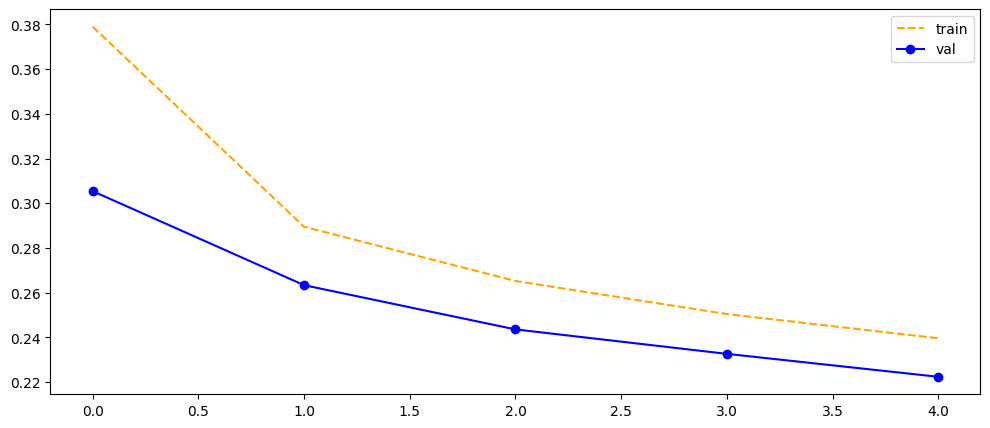

In [95]:
def plot_loss(Loss_train, Loss_val):
    plt.figure(figsize=(12, 5))
    plt.plot(range(len(Loss_train)), Loss_train, color='orange', label='train', linestyle='--')
    plt.plot(range(len(Loss_val)), Loss_val, color='blue', marker='o', label='val')
    plt.legend()
    plt.show()

plot_loss(clf.train_loss, clf.val_loss)

In [96]:
clf.best_model.eval()

# Prepare input
X_val_np = X_val.astype(np.float32)
X_val_tensor = torch.from_numpy(X_val_np).to(clf.device)

# Get predictions
with torch.no_grad():
    logits = clf.predict(X_val_tensor).view(-1)
    probs = torch.sigmoid(logits)                  # Convert logits → probabilities
    test_predictions = (probs > 0.5).long().cpu().numpy()
test_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [97]:
expected_length = 44915 - 2
actual_length = len(test_predictions)

if actual_length != expected_length:
    raise ValueError(f"Expected {expected_length} predictions, but got {actual_length}.")

mapsss = {
    "Neutral or Dissatisfied": 0,
    "Satisfied": 1
}

submission_df = pd.DataFrame({
    'ID': sub_set['ID'],
    'Prediction':  pd.Series(test_predictions.astype(int))
})
submission_df.info()
print(submission_df.head())
print(submission_df.tail())

submission_df.to_csv("SUB.csv", index=False)

print(f"Submission file 'SUB.csv' has been created successfully.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44913 entries, 0 to 44912
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ID          44913 non-null  int64
 1   Prediction  44913 non-null  int32
dtypes: int32(1), int64(1)
memory usage: 526.5 KB
       ID  Prediction
0   98190           0
1  107961           0
2  129503           0
3   92408           0
4  117611           0
           ID  Prediction
44908  117154           0
44909  101603           1
44910  105970           0
44911   89524           0
44912  126606           0
Submission file 'SUB.csv' has been created successfully.
